In [1]:
#import models
import numpy as np
import sys, os
import rospy
import rosbag
import math
from scipy.interpolate import interp1d
import matplotlib.pylab as plt
import time 
from tqdm.auto import tqdm



In [2]:
bag = rosbag.Bag('2023-01-02-09-14-55.bag')

In [4]:
events = []

for topic, msg, t in bag.read_messages():
    if topic == '/dvs/events':
        for e in msg.events:
            event = [e.x, e.y, e.ts.to_nsec(), e.polarity]
            events.append(event)

In [6]:
events = np.array(events)

In [13]:
events.shape

(1464248, 4)

<AxesSubplot: >

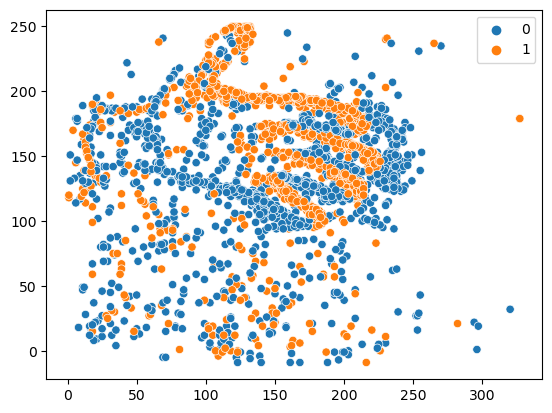

In [20]:
import seaborn as sns
idx = 200000
step = 3000

sns.scatterplot(x=events[idx:idx+step, 0], y=250-events[idx:idx+step, 1], hue=events[idx:idx+step, 3])

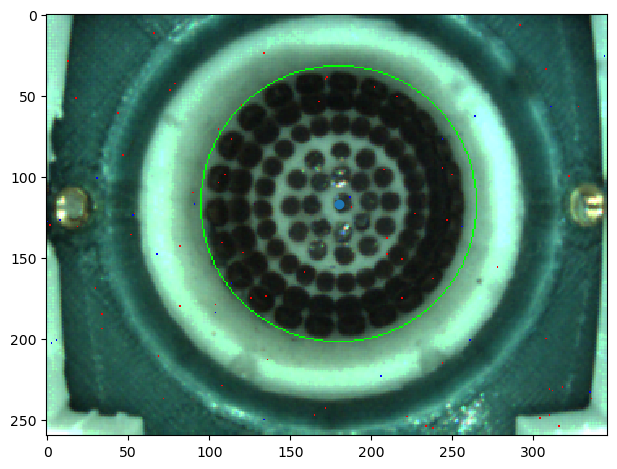

In [48]:
from skimage.io import imread, imshow
from skimage.draw import circle_perimeter

img = imread('/home/hussain/sampe.png')

plt.scatter(180, 117)

rr, cc = circle_perimeter(117, 180, 85)
img[rr, cc, :] = (0, 255, 0)
imshow(img)


In [38]:
img

array([[[158, 242, 201],
        [158, 242, 201],
        [153, 255, 204],
        ...,
        [140, 231, 200],
        [145, 244, 204],
        [145, 244, 204]],

       [[158, 242, 201],
        [158, 242, 201],
        [153, 255, 204],
        ...,
        [140, 231, 200],
        [145, 244, 204],
        [145, 244, 204]],

       [[157, 228, 203],
        [157, 228, 203],
        [152, 239, 203],
        ...,
        [141, 229, 204],
        [147, 234, 207],
        [147, 234, 207]],

       ...,

       [[238, 255, 255],
        [238, 255, 255],
        [240, 255, 255],
        ...,
        [248, 255, 255],
        [241, 255, 255],
        [241, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]